In [1]:
v0 = eval(input("enter initial velocity "))

enter initial velocity 1


In [2]:
a0 = eval(input("enter initial acceleration "))

enter initial acceleration 1


In [3]:
t = 0.0
dt= 0.1
n = 1000

time = []
position = []
xa = []

The physics describing the motion with constant velocity is:
$$ x = v_0 t$$

The physics describing the motion with constant acceleration is:
$$ v = v_0 + a_0 t$$
$$ x = v_0 t + a_0 t^2/2 $$

In [4]:
for i in range(n):
    time.append(t)
    position.append(v0 * t)
    xa.append(v0 * t + a0/2.0 * t ** 2)
    t = t + dt

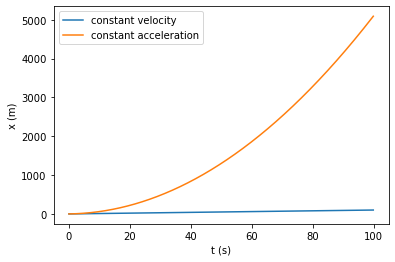

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(time, position, label = "constant velocity")
plt.plot(time, xa, label = "constant acceleration")

plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.legend(loc = 2)

In [6]:
v0x = eval(input("enter initial velocity in the x direction: "))

enter initial velocity in the x direction: 1


In [7]:
v0y = eval(input("enter initial velocity in the y direction: "))

enter initial velocity in the y direction: 1


In [8]:
g = 9.81
xmax = 10
ymax = 10
dt = 0.1 
t0 = 0
x0, y0 = 0, ymax/2

In [9]:
def get_pos():
    t, x, y, vx, vy = t0, x0, y0, v0x, v0y
    while x < xmax:
        x = x + vx * dt
        y = y + vy * dt
        vy = vy - g * dt
        t = t + dt 
        if y < 0:
            y = 0
            vy = -vy
        elif y > ymax:
            y = 0
            vy = -vy
        yield x, y 

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [11]:
def init():
    ax.set_xlim(0, xmax)
    ax.set_ylim(0, ymax)
    ax.set_xlabel('x/m')
    ax.set_ylabel('y/m')
    line.set_data(xdata, ydata)
    ball.set_center((x0, y0))
    height_text.set_text(f'Height: {y0:.1f} m')
    return line, ball, height_text

In [12]:
def animate(pos):
    x, y = pos
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    ball.set_center((x, y))
    height_text.set_text(f'Height: {y:.1f} m')
    return line, ball, height_text

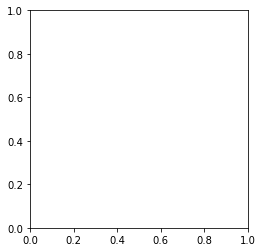

In [13]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

In [14]:
line, = ax.plot([], [], lw=2)
ball = plt.Circle((x0, y0), 0.1, color='black')
height_text = ax.text(xmax*0.5, y0*0.8, f'Height: {y0:.1f} m')
ax.add_patch(ball)
xdata, ydata = [], []

interval = t # change to control the interval
ani = animation.FuncAnimation(fig, animate, get_pos, blit=True,
                      interval=interval, repeat=False, init_func=init)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [15]:
from IPython.display import HTML
HTML(ani.to_jshtml())

# 